# 7. Feature Importance + PDPlots

Back to breast cancer dataset

In [11]:
from sklearn import datasets,model_selection
breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target
target_names = breastCancer.target_names
feature_names = breastCancer.feature_names
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3,random_state=0)

In [12]:
from sklearn.svm import SVC
import xgboost
import shap
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance

print("XGBoost Performance on Breast Cancer:")
model = xgboost.XGBClassifier().fit(x_train,y_train)
y_preds = model.predict(x_test)
print(classification_report(y_test,y_preds,target_names=target_names))
perm = PermutationImportance(model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = feature_names)

XGBoost Performance on Breast Cancer:
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Weight,Feature
0.0292 ± 0.0196,area error
0.0175 ± 0.0209,worst texture
0.0129 ± 0.0281,worst concave points
0.0047 ± 0.0088,worst area
0.0047 ± 0.0088,worst radius
0.0035 ± 0.0119,worst perimeter
0.0023 ± 0.0119,mean texture
0 ± 0.0000,smoothness error
0 ± 0.0000,mean area
0 ± 0.0000,mean concavity


In [53]:
from sklearn.ensemble import RandomForestClassifier
print("Decision Tree Performance on Breast Cancer:")
tree_model = RandomForestClassifier(random_state=0, n_estimators=1000).fit(x_train, y_train)
y_preds = tree_model.predict(x_test)
print(classification_report(y_test,y_preds,target_names=target_names))
perm = PermutationImportance(tree_model).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = feature_names)

Decision Tree Performance on Breast Cancer:
              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Weight,Feature
0.0234 ± 0.0234,worst radius
0.0175 ± 0.0196,worst area
0.0094 ± 0.0140,worst perimeter
0.0094 ± 0.0119,mean texture
0.0082 ± 0.0094,worst texture
0.0023 ± 0.0204,worst concave points
0.0023 ± 0.0094,worst smoothness
0 ± 0.0000,texture error
0 ± 0.0000,mean symmetry
0 ± 0.0000,mean fractal dimension


In [54]:
import numpy as np
df = pd.DataFrame(breastCancer.data, columns=breastCancer.feature_names)

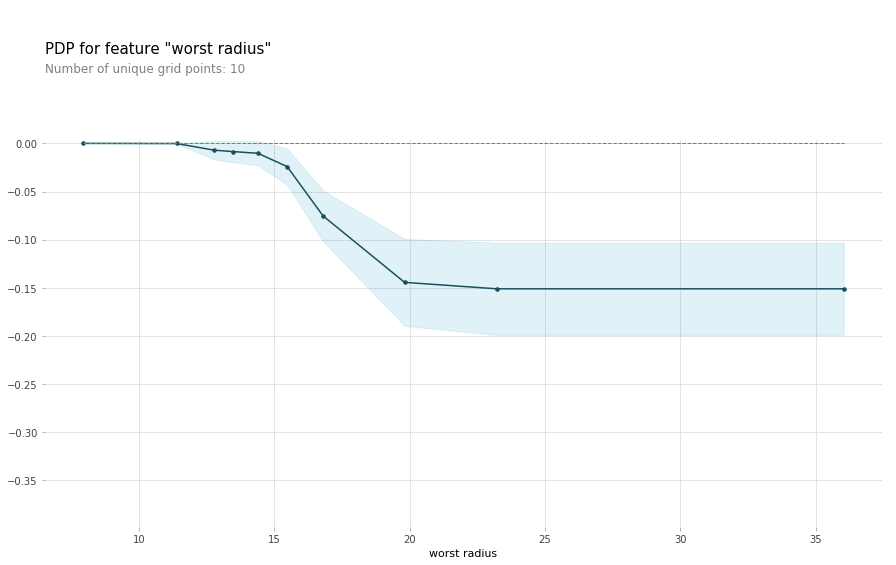

In [55]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import pandas as pd
# Create the data that we will plot
index = ['Row'+str(i) for i in range(1, len(x_test)+1)]
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=df, model_features=df.columns, feature='worst radius')

# plot it
pdp.pdp_plot(pdp_goals, 'worst radius')
plt.show()

A few items are worth pointing out as you interpret this plot!

The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
A blue shaded area indicates level of confidence!
From this particular graph, we see that scoring a worst concavity decreases the chances of being healthy.


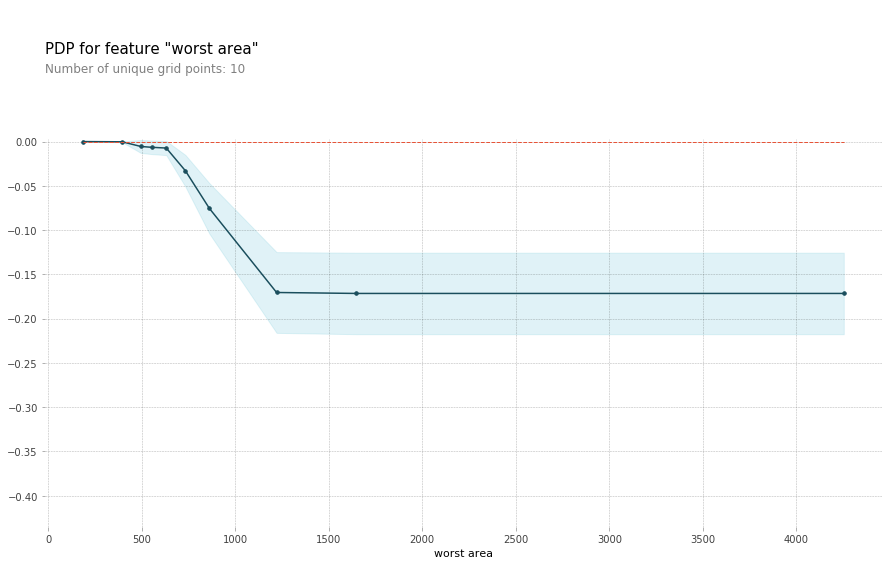

In [56]:
feature_to_plot = 'worst area'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=df, model_features=df.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

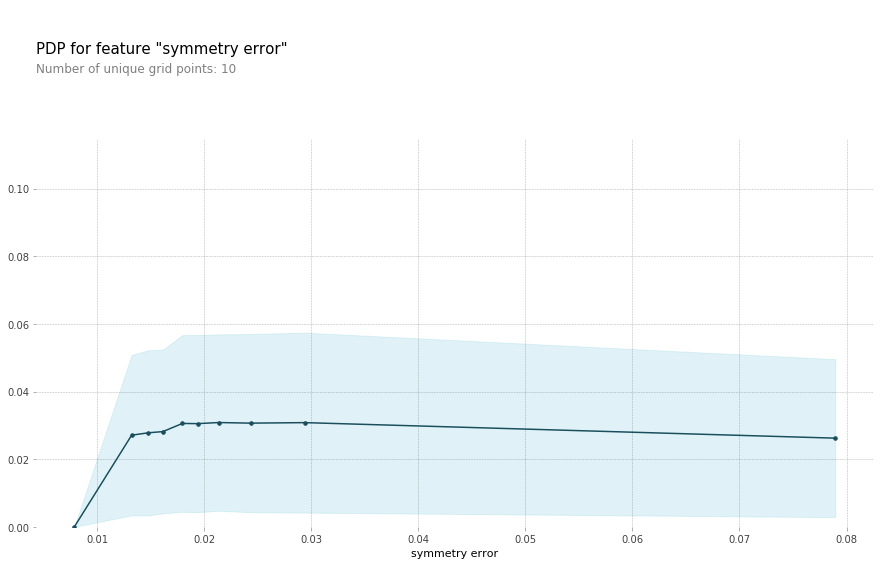

In [57]:
feature_to_plot = 'symmetry error'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=df, model_features=df.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

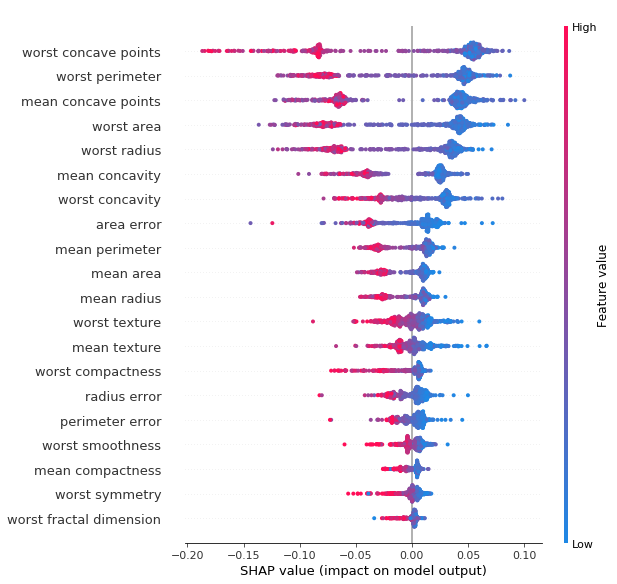

In [67]:
# compute SHAP values
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(df)
shap.summary_plot(shap_values[1], df)

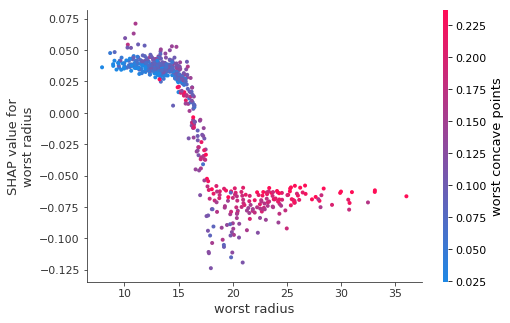

In [68]:
shap.dependence_plot('worst radius', shap_values[1], df, interaction_index="worst concave points")


To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).